<a href="https://colab.research.google.com/github/laibamushtaq0/data-science-internship-2025/blob/main/task1_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1: EDA and Visualization of a Real-World Dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Handle Missing Values
print("\n Missing Values:\n", df.isnull().sum())

# Impute 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many nulls)
df.drop('Cabin', axis=1, inplace=True)

# Remove Duplicates
df = df.drop_duplicates()
print("\n After removing duplicates:", df.shape)

# Outlier Detection (Z-score method for Age and Fare)
from scipy.stats import zscore
df_numeric = df[['Age', 'Fare']]
z_scores = np.abs(zscore(df_numeric))
df = df[(z_scores < 3).all(axis=1)]

print("\n After outlier removal:", df.shape)



 Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 After removing duplicates: (891, 11)

 After outlier removal: (864, 11)


<ipython-input-12-5e8d97f26014>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-12-5e8d97f26014>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

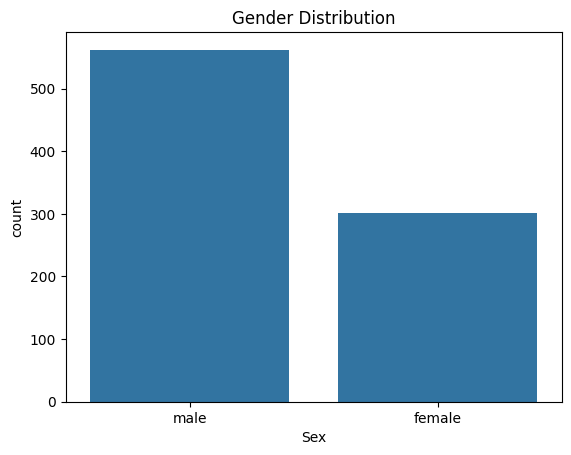

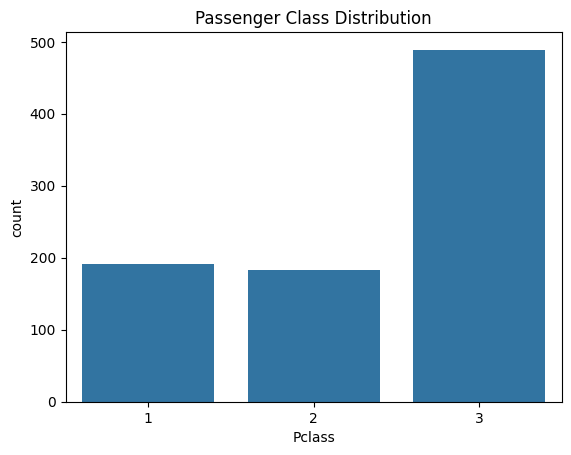

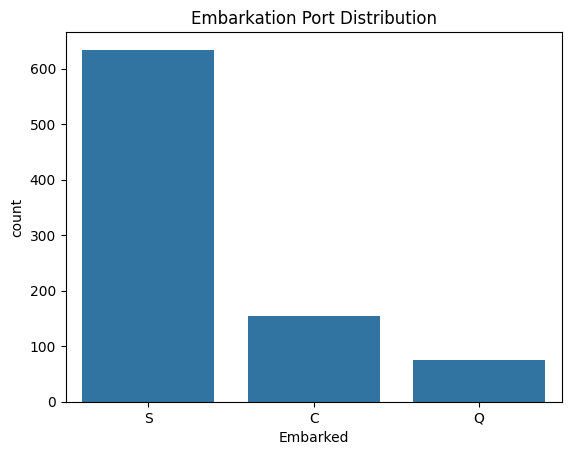

In [14]:
# Categorical Variables: Bar Charts
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.show()

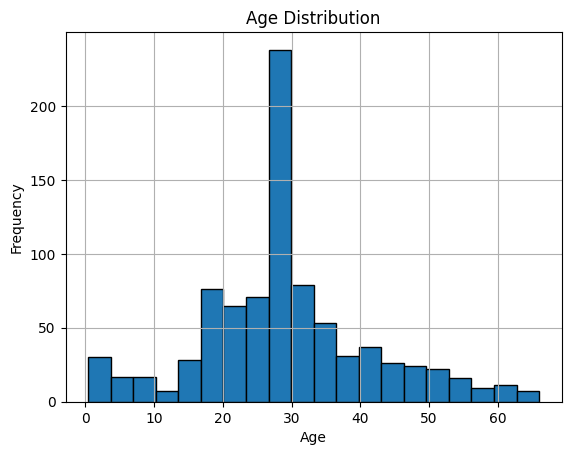

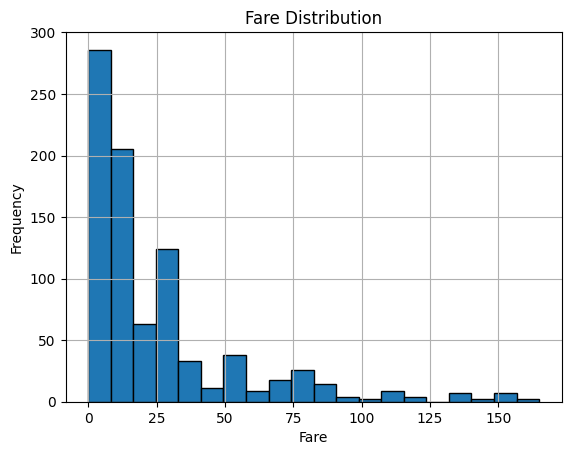

In [15]:
# Numeric Distributions: Histograms
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df['Fare'].hist(bins=20, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

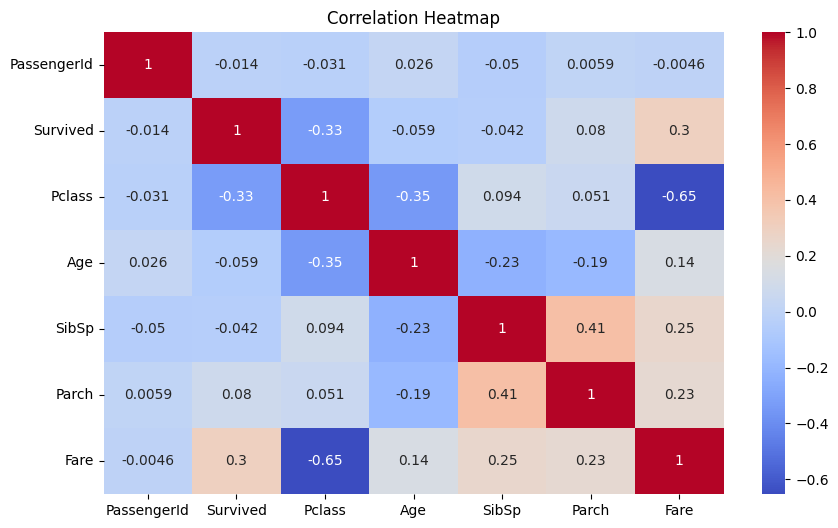

In [16]:
# Correlation Heatmap (numeric only)
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Display key statistics
print("\n Summary Statistics:\n", df.describe())

# Observation Snippets
print("""
Key Insights:

1. Female passengers had a higher survival rate than males.
2. First-class passengers were more likely to survive than others.
3. Most passengers boarded from port 'S' (Southampton).
4. 'Fare' and 'Pclass' show moderate correlation with survival.
5. Outliers existed in 'Fare' and were removed using Z-score method.
6. Age had missing values, handled with median imputation.
7. Cabin feature was dropped due to excessive missing values.
8. Duplicates were found and removed from the dataset.

Dataset is now clean and ready for modeling.
""")



 Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   864.000000  864.000000  864.000000  864.000000  864.000000   
mean    444.748843    0.378472    2.343750   28.978785    0.520833   
std     257.517259    0.485287    0.819028   12.498759    1.104937   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     221.750000    0.000000    2.000000   22.000000    0.000000   
50%     444.500000    0.000000    3.000000   28.000000    0.000000   
75%     664.250000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   66.000000    8.000000   

            Parch        Fare  
count  864.000000  864.000000  
mean     0.368056   26.500689  
std      0.794651   29.400192  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   13.860400  
75%      0.000000   29.775000  
max      6.000000  164.866700  

Key Insights:

1. Female passengers had a higher survival